# Closeness centrality

## Langkah 1: Crawl data judul berita dan isi berita dari Kompas.com

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
from datetime import datetime, timedelta

# URL yang akan di-crawl
base_url = "https://indeks.kompas.com/?site=food"
start_date = "2023-10-01"
end_date = "2023-10-30"

# Membuat list untuk menyimpan data
data = []

# Fungsi untuk mengambil data berita dari halaman web
def crawl_kompas_news(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")

    # Cari semua elemen dengan kelas 'article__list__title'
    news_elements = soup.find_all("div", class_="article__list__title")

    for element in news_elements:
        # Dapatkan judul dan tautan berita
        title = element.h3.a.text
        link = element.h3.a["href"]

        # Crawl isi berita dari tautan judul
        article_text = crawl_kompas_article(link)

        # Tambahkan data ke list
        data.append({"Judul": title, "Isi Berita": article_text})

# Fungsi untuk mengambil isi berita dari tautan judul berita
def crawl_kompas_article(article_url):
    response = requests.get(article_url)
    soup = BeautifulSoup(response.text, "html.parser")

    # Cari elemen dengan kelas 'read__content'
    content_element = soup.find("div", class_="read__content")

    # Dapatkan isi berita
    article_text = content_element.get_text()

    return article_text

# Loop untuk tanggal dari start_date hingga end_date
current_date = datetime.strptime(start_date, "%Y-%m-%d")  # Konversi tanggal awal ke objek datetime
end_date = datetime.strptime(end_date, "%Y-%m-%d")  # Konversi tanggal akhir ke objek datetime

while current_date <= end_date:
    current_url = f"{base_url}{current_date.strftime('%Y-%m-%d')}"  # Menggunakan strftime untuk format tanggal
    print(f"Mengambil berita untuk tanggal {current_date.strftime('%Y-%m-%d')}")
    crawl_kompas_news(current_url)

    # Lanjut ke tanggal berikutnya
    current_date += timedelta(days=1)

# Membuat dataframe pandas dari data
df = pd.DataFrame(data)

# Menyimpan dataframe ke dalam file CSV
df.to_csv("berita_kompas.csv", index=False)

Mengambil berita untuk tanggal 2023-10-01
Mengambil berita untuk tanggal 2023-10-02
Mengambil berita untuk tanggal 2023-10-03
Mengambil berita untuk tanggal 2023-10-04
Mengambil berita untuk tanggal 2023-10-05
Mengambil berita untuk tanggal 2023-10-06
Mengambil berita untuk tanggal 2023-10-07
Mengambil berita untuk tanggal 2023-10-08
Mengambil berita untuk tanggal 2023-10-09
Mengambil berita untuk tanggal 2023-10-10
Mengambil berita untuk tanggal 2023-10-11
Mengambil berita untuk tanggal 2023-10-12
Mengambil berita untuk tanggal 2023-10-13
Mengambil berita untuk tanggal 2023-10-14
Mengambil berita untuk tanggal 2023-10-15
Mengambil berita untuk tanggal 2023-10-16
Mengambil berita untuk tanggal 2023-10-17
Mengambil berita untuk tanggal 2023-10-18
Mengambil berita untuk tanggal 2023-10-19
Mengambil berita untuk tanggal 2023-10-20
Mengambil berita untuk tanggal 2023-10-21
Mengambil berita untuk tanggal 2023-10-22
Mengambil berita untuk tanggal 2023-10-23
Mengambil berita untuk tanggal 202

In [3]:
df["Isi Berita"] = df["Isi Berita"].str.replace('\n', '')

In [4]:
df

,Judul,Isi Berita
0,"Hari Ini dalam Sejarah, Raja Faisal dari Arab ...",KOMPAS.com — Faisal bin Abdulaziz al-Saud dike...
1,"Tarif MRT Bundaran HI-Lebak Bulus Rp 8.500, LR...","JAKARTA, KOMPAS.com - Dalam rapat pimpinan gab..."
2,"MUI Minta Masyarakat Stop Pakai Istilah ""Cebon...","Jakarta, KOMPAS.com — Majelis Ulama Indonesia ..."
3,Pemantau Asing dari 33 Negara Akan Ikut Memoni...,"JAKARTA, KOMPAS.com — Komisioner Komisi Pemili..."
4,Ridwan Kamil Optimistis Tol Cisumdawu Bawa Per...,"BANDUNG, KOMPAS.com - Perkembangan pengerjaan ..."
...,...,...
295,5 Fakta Turis Asing Ingin Dekati Kawah hingga ...,KOMPAS.com - Seorang wisatawan asing di kawasa...
296,TKN Jokowi-Ma'ruf Sebut Ada Bendera HTI di Kam...,"JAKARTA, KOMPAS.com - Anggota Dewan Pengarah B..."
297,Cemburu Jadi Motif Pelaku Bunuh Pria yang Jena...,"BATAM, KOMPAS.com - Kasus pembunuhan pria yang..."
298,Video: Detik-detik Jatuhnya Meteor 10 Kali Bom...,"KOMPAS.com - 18 Desember tahun lalu, sebuah me..."


In [5]:
df.to_csv("Data_berita.csv", index=False)

## Langkah 2: Ekstraksi Kalimat (NLTK)

In [7]:
import pandas as pd

In [8]:
df = pd.read_csv("/content/drive/MyDrive/ppw/tugas/Data/Data_berita.csv")
df

,Judul,Isi Berita
0,"Hari Ini dalam Sejarah, Raja Faisal dari Arab ...",KOMPAS.com — Faisal bin Abdulaziz al-Saud dike...
1,"Tarif MRT Bundaran HI-Lebak Bulus Rp 8.500, LR...","JAKARTA, KOMPAS.com - Dalam rapat pimpinan gab..."
2,"MUI Minta Masyarakat Stop Pakai Istilah ""Cebon...","Jakarta, KOMPAS.com — Majelis Ulama Indonesia ..."
3,Pemantau Asing dari 33 Negara Akan Ikut Memoni...,"JAKARTA, KOMPAS.com — Komisioner Komisi Pemili..."
4,Ridwan Kamil Optimistis Tol Cisumdawu Bawa Per...,"BANDUNG, KOMPAS.com - Perkembangan pengerjaan ..."
...,...,...
295,5 Fakta Turis Asing Ingin Dekati Kawah hingga ...,KOMPAS.com - Seorang wisatawan asing di kawasa...
296,TKN Jokowi-Ma'ruf Sebut Ada Bendera HTI di Kam...,"JAKARTA, KOMPAS.com - Anggota Dewan Pengarah B..."
297,Cemburu Jadi Motif Pelaku Bunuh Pria yang Jena...,"BATAM, KOMPAS.com - Kasus pembunuhan pria yang..."
298,Video: Detik-detik Jatuhnya Meteor 10 Kali Bom...,"KOMPAS.com - 18 Desember tahun lalu, sebuah me..."


In [9]:
berita = df['Isi Berita'].iloc[0]
print(berita)

KOMPAS.com — Faisal bin Abdulaziz al-Saud dikenal sebagai salah satu raja yang memiliki pengaruh besar dalam Kerajaan Arab Saudi. Saat Raja Faisal memimpin (1964-1975), dia dianggap sebagai tokoh yang membawa pandangan modern.Raja Faisal juga tercatat sebagai orang yang menghapus perbudakan di Arab Saudi serta salah satu tokoh di Timur Tengah yang tegas dalam menolak dominasi Amerika Serikat atau Uni Soviet.Saat memimpin, Raja Faisal bahkan secara tegas mengkritik standar ganda negara Barat terkait kemerdekaan Palestina. Ini menyebabkan Raja Faisal melakukan boikot minyak ke negara Barat yang dianggap terlalu membela Israel. Aksi ini mengakibatkan krisis minyak pada 1973.Namun, hari ini 44 tahun yang lalu, tragedi melanda Arab Saudi. https://twitter.com/elisa_jkt/status/1109761623344844801Pada 25 Maret 1975, Raja Faisal dibunuh oleh keponakannya sendiri, Pangeran Faisal Ibu Musaed.Pangeran Faisal menembakkan tiga peluru ke tubuh Raja dari jarak dekat. Peristiwa itu terjadi saat berlang

In [10]:
#install library
!pip install sastrawi
!pip install swifter
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 13.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16507 sha256=19e38cd4270052d71c5b5ce4ece2fa3d383374bc79b355fbd30ac0c4423f66dd
  Stored in directory: /root/.cache/pip/wheels/e4/cf/51/0904952972ee2c7aa3709437065278dc534ec1b8d2ad41b443
Successfully built swifter


In [11]:
import numpy as np
from nltk.corpus import stopwords
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## Langkah 3: TF IDF

In [12]:
kalimat = nltk.sent_tokenize(berita)

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(kalimat)

terms = tfidf_vectorizer.get_feature_names_out()

for i, sentence in enumerate(kalimat):
    print(f"\nKalimat {i+1}: {sentence}")
    for j, term in enumerate(terms):
        tfidf_value = tfidf_matrix[i, j]
        if tfidf_value > 0:
            print(f"{term}: {tfidf_value:.4f}")


Kalimat 1: KOMPAS.com — Faisal bin Abdulaziz al-Saud dikenal sebagai salah satu raja yang memiliki pengaruh besar dalam Kerajaan Arab Saudi.
abdulaziz: 0.2621
al: 0.2621
arab: 0.1841
besar: 0.2621
bin: 0.2621
com: 0.2276
dalam: 0.1686
dikenal: 0.2621
faisal: 0.1096
kerajaan: 0.2031
kompas: 0.2621
memiliki: 0.2621
pengaruh: 0.2621
raja: 0.1341
salah: 0.2031
satu: 0.2276
saud: 0.2621
saudi: 0.1841
sebagai: 0.2276
yang: 0.1341

Kalimat 2: Saat Raja Faisal memimpin (1964-1975), dia dianggap sebagai tokoh yang membawa pandangan modern.Raja Faisal juga tercatat sebagai orang yang menghapus perbudakan di Arab Saudi serta salah satu tokoh di Timur Tengah yang tegas dalam menolak dominasi Amerika Serikat atau Uni Soviet.Saat memimpin, Raja Faisal bahkan secara tegas mengkritik standar ganda negara Barat terkait kemerdekaan Palestina.
1964: 0.1303
1975: 0.1131
amerika: 0.1303
arab: 0.0915
atau: 0.1303
bahkan: 0.1303
barat: 0.1131
dalam: 0.0838
di: 0.1830
dia: 0.1303
dianggap: 0.1131
dominasi: 0

## Langkah 4: Cosine Similarity

In [13]:
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
import matplotlib.pyplot as plt

In [14]:
cosine_similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)

for i in range(len(kalimat)):
    for j in range(i+1, len(kalimat)):
        similarity = cosine_similarities[i][j]
        print(f"Similarity Kalimat {i+1} dan Kalimat {j+1}: {similarity:.4f}")

Similarity Kalimat 1 dan Kalimat 2: 0.2171
Similarity Kalimat 1 dan Kalimat 3: 0.0584
Similarity Kalimat 1 dan Kalimat 4: 0.0879
Similarity Kalimat 1 dan Kalimat 5: 0.0949
Similarity Kalimat 1 dan Kalimat 6: 0.0841
Similarity Kalimat 1 dan Kalimat 7: 0.0436
Similarity Kalimat 1 dan Kalimat 8: 0.0572
Similarity Kalimat 1 dan Kalimat 9: 0.0184
Similarity Kalimat 1 dan Kalimat 10: 0.0377
Similarity Kalimat 1 dan Kalimat 11: 0.0750
Similarity Kalimat 1 dan Kalimat 12: 0.0496
Similarity Kalimat 1 dan Kalimat 13: 0.0208
Similarity Kalimat 1 dan Kalimat 14: 0.0355
Similarity Kalimat 1 dan Kalimat 15: 0.0218
Similarity Kalimat 2 dan Kalimat 3: 0.1811
Similarity Kalimat 2 dan Kalimat 4: 0.0620
Similarity Kalimat 2 dan Kalimat 5: 0.1020
Similarity Kalimat 2 dan Kalimat 6: 0.1093
Similarity Kalimat 2 dan Kalimat 7: 0.0957
Similarity Kalimat 2 dan Kalimat 8: 0.0481
Similarity Kalimat 2 dan Kalimat 9: 0.0275
Similarity Kalimat 2 dan Kalimat 10: 0.0814
Similarity Kalimat 2 dan Kalimat 11: 0.1018
Sim

In [15]:
similarity_df = pd.DataFrame(cosine_similarities, columns=range(len(kalimat)), index=range(len(kalimat)))
similarity_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.000000,0.217078,0.058381,0.087916,0.094867,0.084127,0.043602,0.057184,0.018419,0.037662,0.075048,0.049556,0.020849,0.035470,0.021754
1,0.217078,1.000000,0.181107,0.062034,0.102027,0.109334,0.095673,0.048069,0.027473,0.081415,0.101810,0.039595,0.085873,0.000000,0.032447
2,0.058381,0.181107,1.000000,0.131945,0.098798,0.055011,0.053085,0.051221,0.073880,0.104920,0.061622,0.036627,0.087967,0.018821,0.026485
3,0.087916,0.062034,0.131945,1.000000,0.000000,0.059636,0.016756,0.000000,0.000000,0.144737,0.124090,0.117046,0.068704,0.031701,0.000000
4,0.094867,0.102027,0.098798,0.000000,1.000000,0.106974,0.075223,0.071609,0.028241,0.034566,0.133786,0.000000,0.095796,0.050894,0.099954
5,0.084127,0.109334,0.055011,0.059636,0.106974,1.000000,0.064304,0.095266,0.013880,0.206978,0.068946,0.011335,0.111033,0.152178,0.057323
6,0.043602,0.095673,0.053085,0.016756,0.075223,0.064304,1.000000,0.171168,0.048326,0.155932,0.057131,0.013677,0.088208,0.067061,0.049387
7,0.057184,0.048069,0.051221,0.000000,0.071609,0.095266,0.171168,1.000000,0.012134,0.089956,0.015162,0.000000,0.083282,0.033549,0.035779
8,0.018419,0.027473,0.073880,0.000000,0.028241,0.013880,0.048326,0.012134,1.000000,0.022398,0.000000,0.044415,0.036691,0.075517,0.000000
9,0.037662,0.081415,0.104920,0.144737,0.034566,0.206978,0.155932,0.089956,0.022398,1.000000,0.049423,0.063923,0.122494,0.076292,0.014031


## Langkah 5: Graph

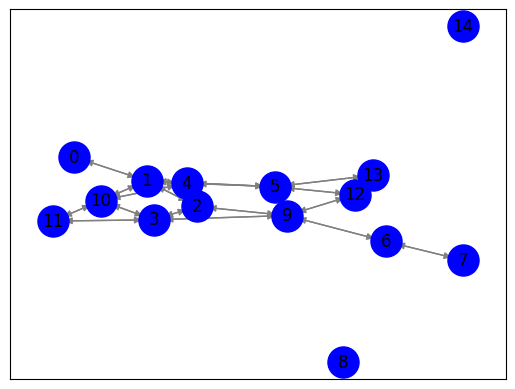

In [18]:
G = nx.DiGraph()
for i in range(len(cosine_similarities)):
    G.add_node(i)

for i in range(len(cosine_similarities)):
    for j in range(len(cosine_similarities)):
        similarity = cosine_similarities[i][j]
        if similarity > 0.100 and i != j:
            G.add_edge(i, j)

pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='b')
nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True)
nx.draw_networkx_labels(G, pos)

plt.show()

## Langkah 6: Closeness Centrality

In [19]:
closeness_centrality = nx.closeness_centrality(G)

sorted_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)
print("\nSorted Closeness Centrality:")
for node, closeness in sorted_closeness:
    print(f"Node {node}: {closeness:.4f}")


Sorted Closeness Centrality:
Node 9: 0.5143
Node 5: 0.4898
Node 1: 0.4675
Node 2: 0.4472
Node 3: 0.4472
Node 4: 0.4286
Node 10: 0.4114
Node 12: 0.4114
Node 6: 0.3547
Node 11: 0.3429
Node 13: 0.3318
Node 0: 0.3117
Node 7: 0.2571
Node 8: 0.0000
Node 14: 0.0000


In [20]:
print("\nTiga Node Tertinggi dengan Kalimat:")
for node, closeness in sorted_closeness[:3]:
    top_sentence = kalimat[node]
    print(f"Node {node}: Closeness Centrality = {closeness:.4f}")
    print(f"Kalimat: {top_sentence}\n")


Tiga Node Tertinggi dengan Kalimat:
Node 9: Closeness Centrality = 0.5143
Kalimat: Namun, luka tembak yang diterimanya terlalu fatal untuk ditangani.Ia pun tutup usia pada hari itu juga, di usia ke-69.Baca juga: Hari Ini dalam Sejarah: Penemuan Struktur DNA ManusiaJadi tersangkaPangeran Faisal langsung ditangkap dan diamankan untuk dimintai keterangan.

Node 5: Closeness Centrality = 0.4898
Kalimat: Peristiwa itu terjadi saat berlangsung audiensi kerajaan.Baca juga: Hari Ini dalam Sejarah, Rolls-Royce Memulai DebutnyaKejadianDilansir dari BBC, sebelum penembakan terjadi Raja Faisal membungkukkan badan untuk mencium sang keponakan, Pangeran Faisal.

Node 1: Closeness Centrality = 0.4675
Kalimat: Saat Raja Faisal memimpin (1964-1975), dia dianggap sebagai tokoh yang membawa pandangan modern.Raja Faisal juga tercatat sebagai orang yang menghapus perbudakan di Arab Saudi serta salah satu tokoh di Timur Tengah yang tegas dalam menolak dominasi Amerika Serikat atau Uni Soviet.Saat memimpin,